#### Importing Necessary Libraries for Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing TBC E-commerce Dataset

In [3]:
df = pd.read_csv('TBC_Ecommerce.csv', encoding='latin')

In [4]:
df.head()

,SKU,Product,Order number,Date placed,Quantity,Unit price,Total price,Order status,Categories,Customer email,Customer phone,Customer name
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [5]:
#Rename Column-Headers with Compacted Names for Easy Recalling

In [6]:
df.rename(columns={'SKU':'SKU', 'Product':'Product', 'Order number':'OrderNumber', 'Date placed':'OrderDate', 
                              'Quantity':'Quantity','Unit price':'UnitPrice', 'Total price':'TotalPrice', 
                              'Order status':'OrderStatus','Categories':'Categories','Customer email':'CustomerEmail', 
                              'Customer phone':'CustomerPhone','Customer name':'CustomerName'}, inplace=True)

In [7]:
#Understanding the Data using Describe and info

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderNumber,116171.0,2.262956e+05,1.014734e+05,2.001800e+04,1.533270e+05,2.498590e+05,3.108700e+05,3.780340e+05
Quantity,116171.0,1.664383e+00,5.387666e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.059000e+03
UnitPrice,116171.0,1.260292e+03,5.564590e+03,-1.000000e+00,2.030000e+02,4.900000e+02,9.500000e+02,3.080000e+05
TotalPrice,116171.0,1.472117e+03,6.200854e+03,-1.000000e+00,2.550000e+02,5.440000e+02,1.050000e+03,3.080000e+05
CustomerPhone,114455.0,2.565060e+11,1.173878e+11,2.679088e+09,2.547160e+11,2.547224e+11,2.547265e+11,8.618634e+12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116171 entries, 0 to 116170
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SKU            116171 non-null  object 
 1   Product        115373 non-null  object 
 2   OrderNumber    116171 non-null  int64  
 3   OrderDate      116171 non-null  object 
 4   Quantity       116171 non-null  int64  
 5   UnitPrice      116171 non-null  float64
 6   TotalPrice     116171 non-null  float64
 7   OrderStatus    116171 non-null  object 
 8   Categories     115108 non-null  object 
 9   CustomerEmail  116048 non-null  object 
 10  CustomerPhone  114455 non-null  float64
 11  CustomerName   114786 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 10.6+ MB


In [10]:
#Changing Dataset into a Time-Series Dataset by Transforming a String Date into a DateTime Format

In [11]:
#Convert OrderDate to Datetime
from datetime import datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%d/%m/%Y %H:%M')
df.set_index('OrderDate', inplace=True)

df.head(3)

,SKU,Product,OrderNumber,Quantity,UnitPrice,TotalPrice,OrderStatus,Categories,CustomerEmail,CustomerPhone,CustomerName
OrderDate,,,,,,,,,,,
2016-06-16 20:43:00,2030301005022,The Wolf of Wall Street,20018,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2016-06-16 20:43:00,2030301003312,Decision Points,20018,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2016-06-16 20:43:00,2030301004296,Ghana must go,20018,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A


In [12]:
#First Date of Transaction on the Dataset
first_date = df.index.min()
print('First date', first_date)

#Last Date of Transaction on the Dataset
latest_date = df.index.min()
print('Latest date', latest_date)

First date 2016-06-16 20:43:00
Latest date 2016-06-16 20:43:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116171 entries, 2016-06-16 20:43:00 to 2021-01-19 16:55:00
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SKU            116171 non-null  object 
 1   Product        115373 non-null  object 
 2   OrderNumber    116171 non-null  int64  
 3   Quantity       116171 non-null  int64  
 4   UnitPrice      116171 non-null  float64
 5   TotalPrice     116171 non-null  float64
 6   OrderStatus    116171 non-null  object 
 7   Categories     115108 non-null  object 
 8   CustomerEmail  116048 non-null  object 
 9   CustomerPhone  114455 non-null  float64
 10  CustomerName   114786 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 10.6+ MB


In [14]:
df['OrderNumber'].value_counts()

209451    275
208247    257
209450    256
348143    137
353165    137
         ... 
148500      1
140312      1
80016       1
242730      1
353228      1
Name: OrderNumber, Length: 33555, dtype: int64

In [15]:
print(df.groupby(df.index.date)['OrderNumber'].nunique())

2016-06-16     1
2016-06-17    10
2016-06-18     4
2016-06-19     1
2016-06-20     4
              ..
2021-01-15    53
2021-01-16    34
2021-01-17    37
2021-01-18    49
2021-01-19    41
Name: OrderNumber, Length: 1662, dtype: int64


In [16]:
daily_orders = df.groupby(df.index.date)['OrderNumber'].nunique()

In [17]:
daily_orders.head()

2016-06-16     1
2016-06-17    10
2016-06-18     4
2016-06-19     1
2016-06-20     4
Name: OrderNumber, dtype: int64

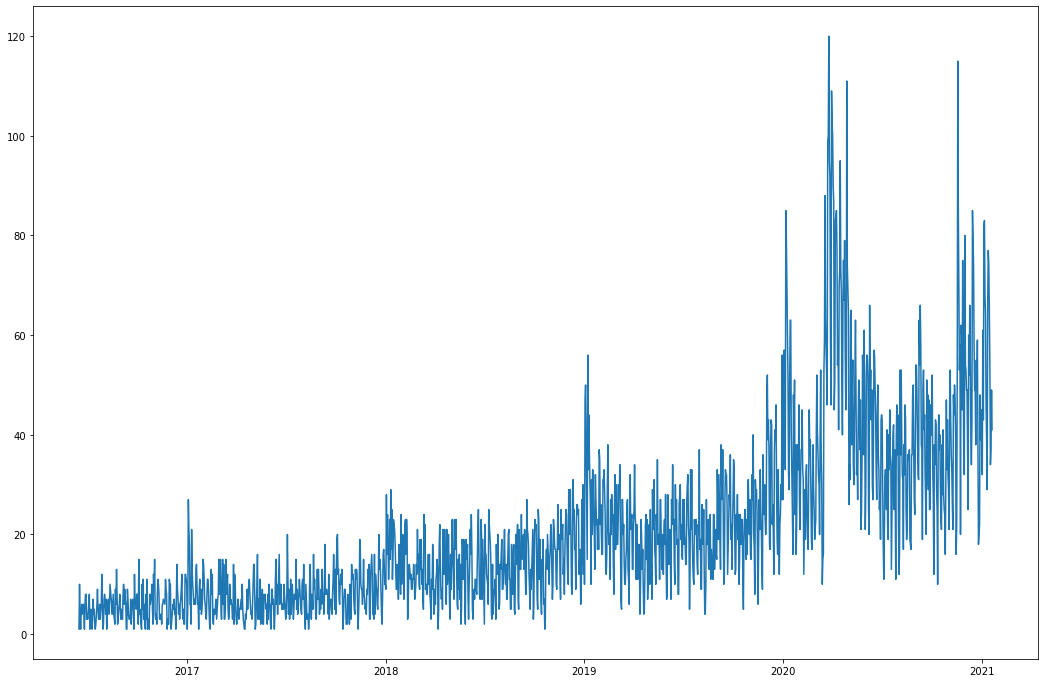

In [18]:
daily_orders.plot(figsize=(18,12))

In [19]:
#Extract Combined Daily Orders as a list into Excel.

daily_orders.to_csv(r'Number_of_Daily_Orders.csv', index=True, header=True)

### Converting the acquired Combined Daily Orders into a DataFrame

In [20]:
df2=pd.DataFrame(data=daily_orders)

In [21]:
df2.head()

,OrderNumber
2016-06-16,1
2016-06-17,10
2016-06-18,4
2016-06-19,1
2016-06-20,4


In [22]:
df2.index

Index([2016-06-16, 2016-06-17, 2016-06-18, 2016-06-19, 2016-06-20, 2016-06-21,
       2016-06-22, 2016-06-23, 2016-06-24, 2016-06-25,
       ...
       2021-01-10, 2021-01-11, 2021-01-12, 2021-01-13, 2021-01-14, 2021-01-15,
       2021-01-16, 2021-01-17, 2021-01-18, 2021-01-19],
      dtype='object', length=1662)

In [23]:
#Changing the data-type of the Index from 'Object' to 'Datetime'
df2.index = pd.to_datetime(df2.index,format='%Y/%m/%d')
df2.index

DatetimeIndex(['2016-06-16', '2016-06-17', '2016-06-18', '2016-06-19',
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-25',
               ...
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
               '2021-01-18', '2021-01-19'],
              dtype='datetime64[ns]', length=1662, freq=None)

In [24]:
#Latest Date of the Order
latest_date = df2.max()
print('Latest_Date', latest_date)

#Latest Date
first_date = df2.min()
print('first_Date', first_date)

Latest_Date OrderNumber    120
dtype: int64
first_Date OrderNumber    1
dtype: int64


#### General Percentage Increase in OrderNumber from July-2016 to Dec-2020

In [25]:
#Locating the actual dates using index max and index min as above
#Calculating the General Percentage 
general_percentage_increase = 100 * (df2.loc['2021-01-19'] - df2.loc['2016-06-16']) / df2.loc['2016-06-16']

print('Percentage Increase of Orders between June 2016 to Jan 2021 is: ', general_percentage_increase)

Percentage Increase of Orders between June 2016 to Jan 2021 is:  OrderNumber    4000.0
dtype: float64


#### General Percentage Increase in OrderNumber from July-2018 to June-2020

In [26]:
percentage_increase_2018_2020 = 100*(df2.loc['2020-06-30'] - df2.loc['2018-07-01']) / df2.loc['2018-07-01']

print('Percentage Increase of Orders between July 2018 to July 2020 is: ', percentage_increase_2018_2020)

Percentage Increase of Orders between July 2018 to July 2020 is:  OrderNumber    2100.0
dtype: float64


In [27]:
#What is the Least Day after Jan-2018 to March-2020 (Before Covid-19) ?

df2.loc['2018-01-01':'2020-02-29'].idxmin()

OrderNumber   2018-04-07
dtype: datetime64[ns]

In [28]:
#What is the Least Day after March-2020 (After Covid-19) ?

df2.loc['2020-04-01':].idxmin()

OrderNumber   2020-10-11
dtype: datetime64[ns]

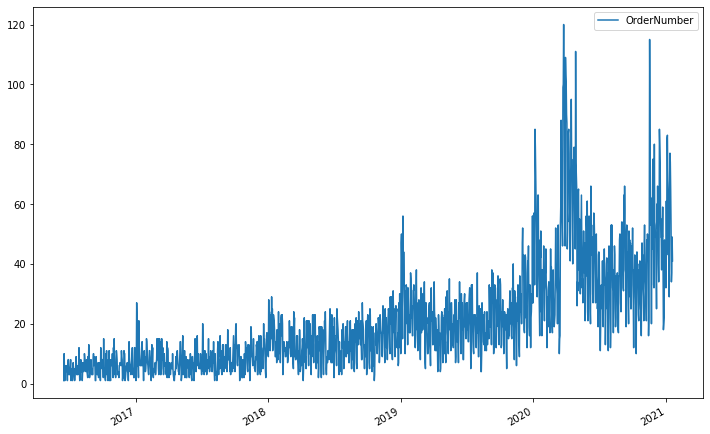

In [29]:
#6-Highest Order Numbers by Value
df2.sort_values(by='OrderNumber', ascending=False).plot(figsize=(12,8))


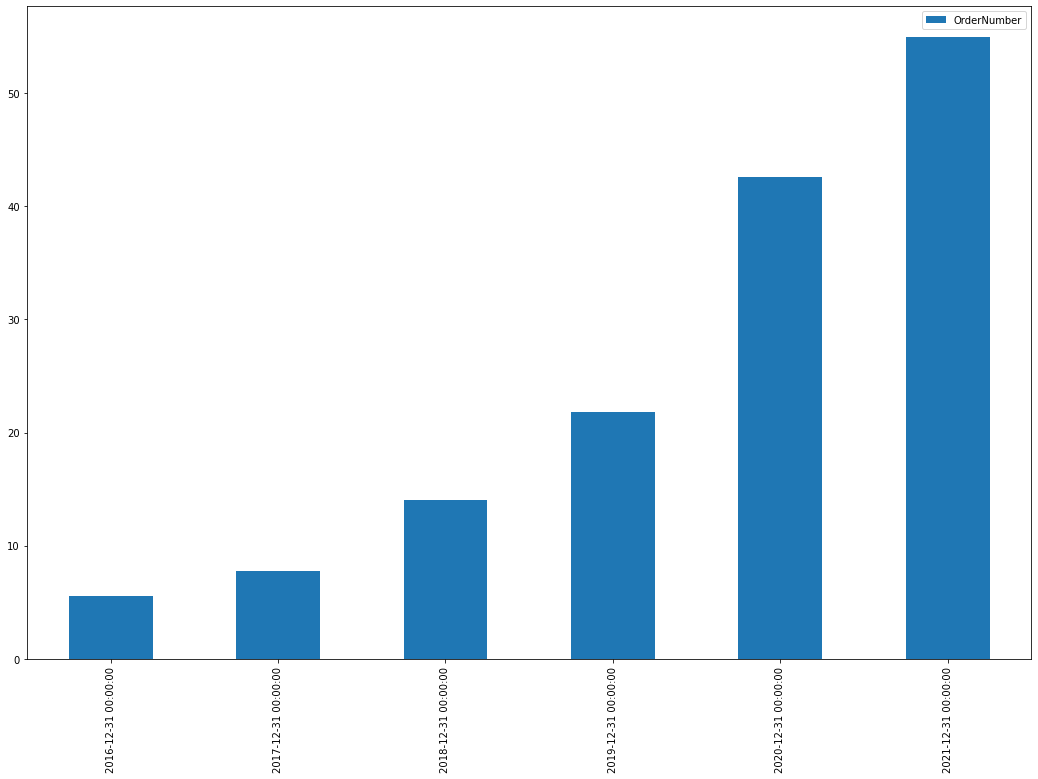

In [30]:
#Average Order-Number per Year
df2.resample('Y').mean().plot.bar(figsize=(18,12))

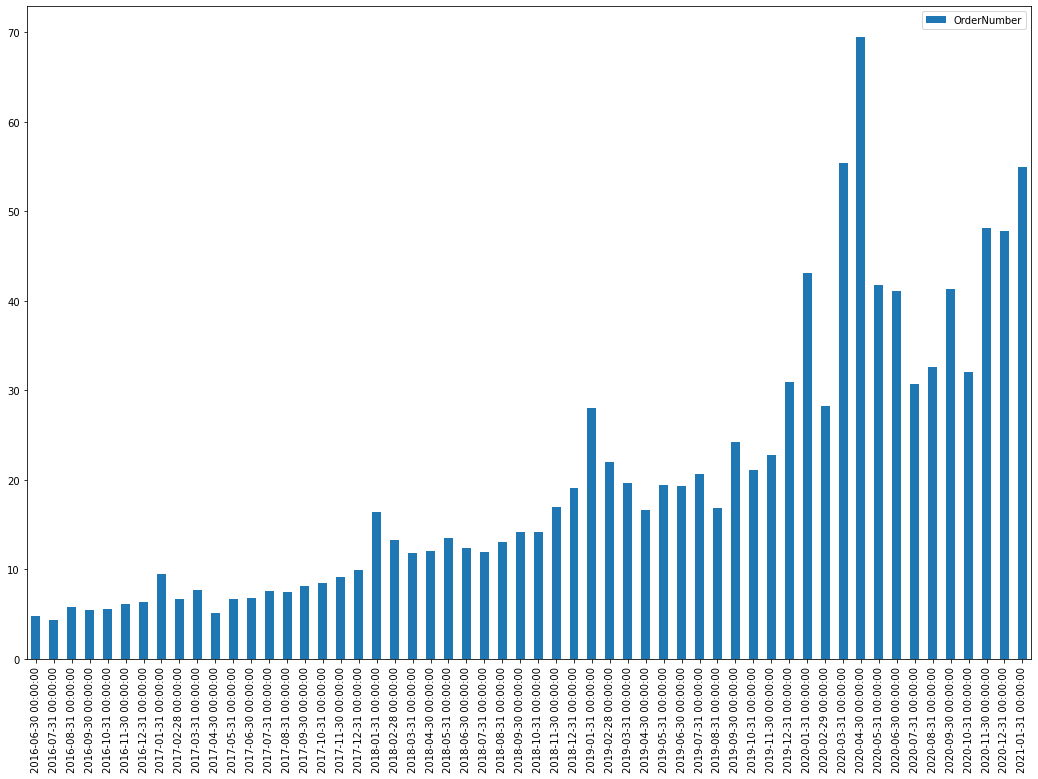

In [31]:
#Average Order-Number per Month
df2.resample('m').mean().plot.bar(figsize=(18,12))

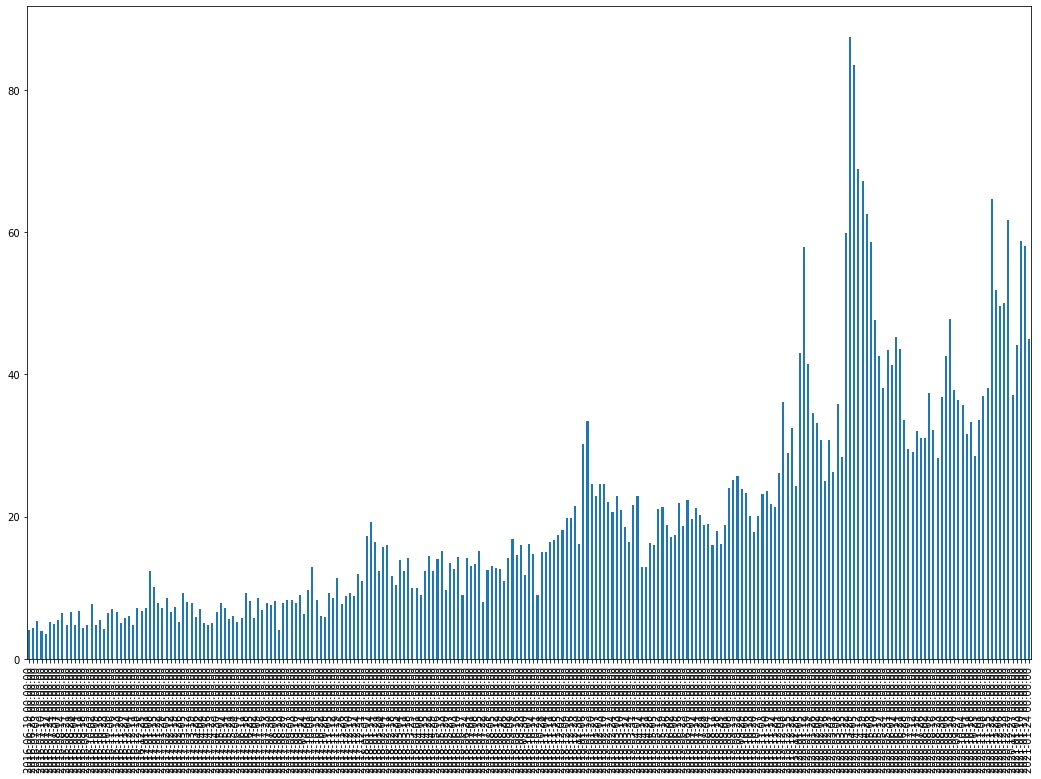

In [32]:
#Average Order-Number per Week
df2['OrderNumber'].resample('w').mean().plot.bar(figsize=(18,12))

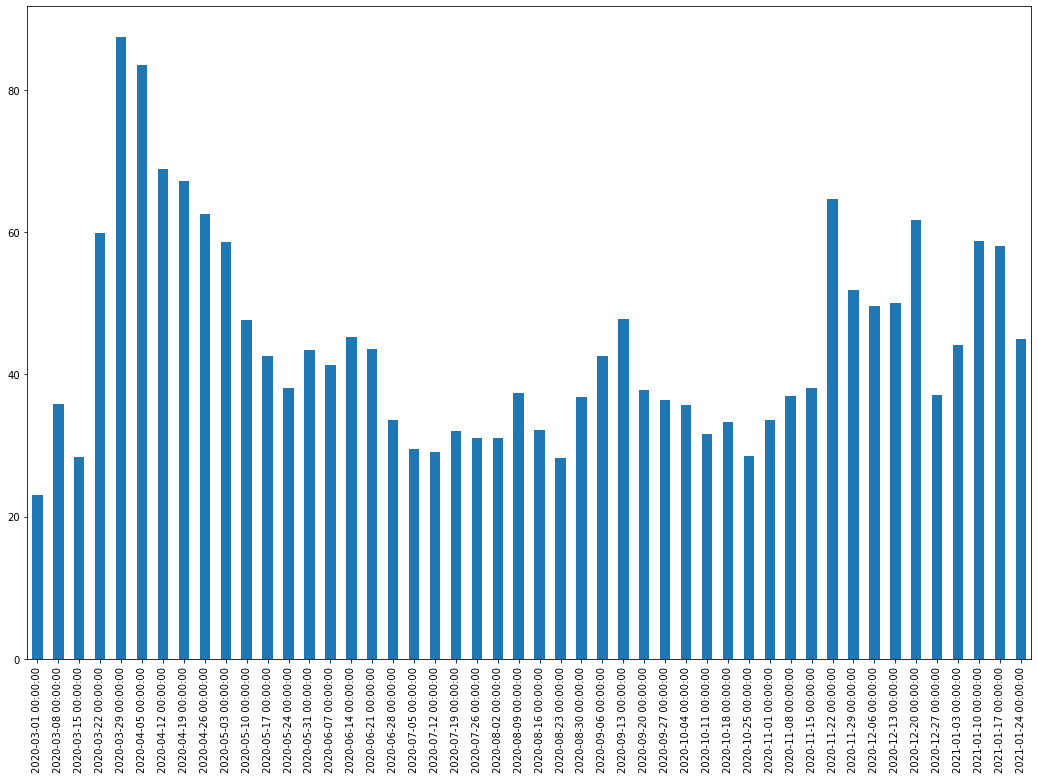

In [33]:
#Average Order-Number per Week After Covid-19 Pandemic Hit
df2['OrderNumber']['2020-03-01':].resample('w').mean().plot.bar(figsize=(18,12))

#### What year had the biggest increase in mean value from the previous year's mean value?

In [34]:
yearly_data = df2.resample('Y').mean()

In [35]:
yearly_data_shift = yearly_data.shift(1)

In [36]:
yearly_change = yearly_data - yearly_data_shift

In [37]:
yearly_change

,OrderNumber
2016-12-31,NaN
2017-12-31,2.265045
2018-12-31,6.300925
2019-12-31,7.720548
2020-12-31,20.833902
2021-12-31,12.321685


In [38]:
yearly_change['OrderNumber'].idxmax()

Timestamp('2020-12-31 00:00:00', freq='A-DEC')

#### What month had the biggest increase in mean value from the previous month's mean value?

In [39]:
monthly_data = df2.resample('m').mean()

In [40]:
monthly_data_shift = monthly_data.shift(1)

In [41]:
monthly_change = monthly_data - monthly_data_shift

In [42]:
monthly_change

,OrderNumber
2016-06-30,NaN
2016-07-31,-0.457471
2016-08-31,1.517241
2016-09-30,-0.393103
2016-10-31,0.100000
2016-11-30,0.607143
2016-12-31,0.272167
2017-01-31,3.040044
2017-02-28,-2.740783
2017-03-31,0.988095


In [43]:
monthly_change['OrderNumber'].idxmax()

Timestamp('2020-03-31 00:00:00', freq='M')

#### Yearly Rolling mean on together with the original data.

In [44]:
#Using Simple Moving Average - 12months

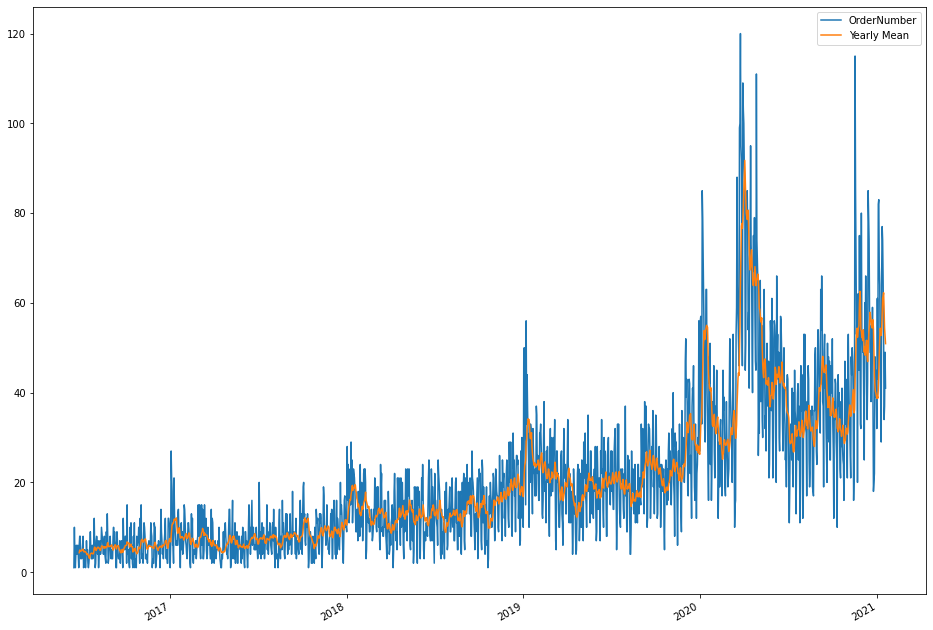

In [45]:
df2['Yearly Mean'] = df2['OrderNumber'].rolling(window=12).mean()
df2.plot(figsize=(16,12))

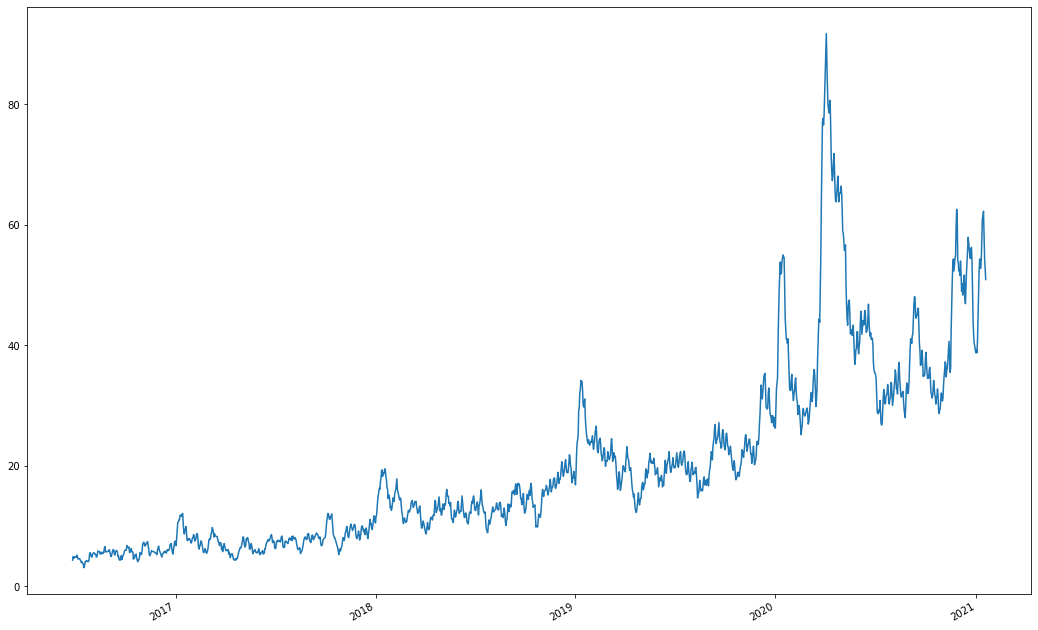

In [46]:
df2['Yearly Mean'].plot(figsize=(18,12))

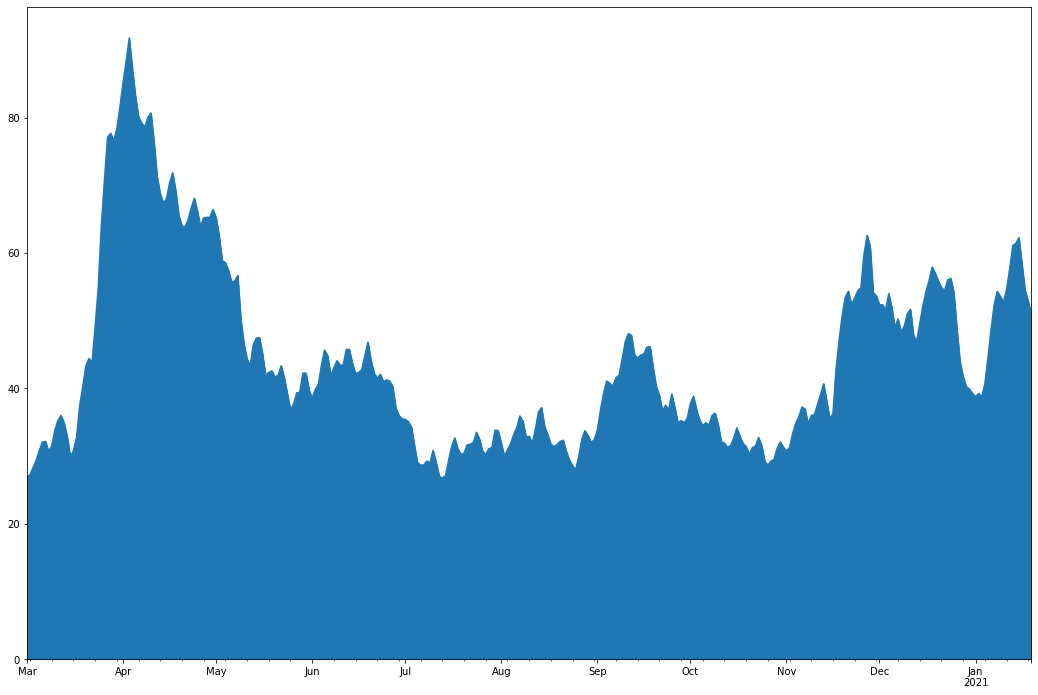

In [47]:
#Mean of Order-Numbers After Covid-19 Hit

df2['Yearly Mean']['2020-03-01':].plot(kind='area',figsize=(18,12))

In [48]:
df2.head()

,OrderNumber,Yearly Mean
2016-06-16,1,NaN
2016-06-17,10,NaN
2016-06-18,4,NaN
2016-06-19,1,NaN
2016-06-20,4,NaN


### Use of Statsmodels to Perform Statistical Analysis

In [49]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [50]:
order_cycle,order_trend = hpfilter(df2['OrderNumber'],lamb=1600)

In [51]:
#Confirm that the values are a Series
type(order_trend)

pandas.core.series.Series

In [52]:
df2['trend'] = order_trend

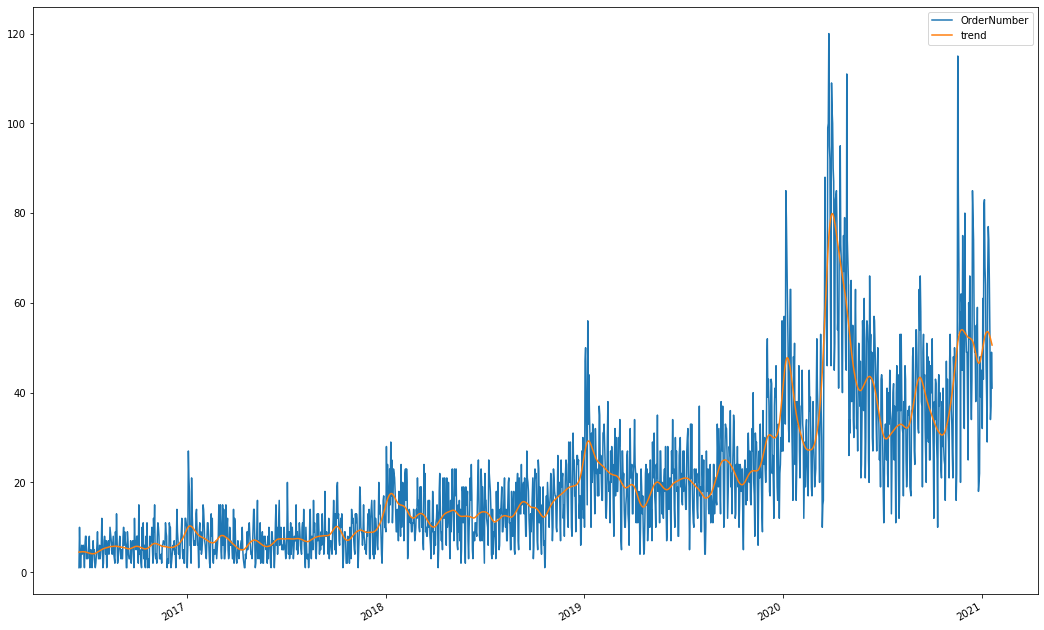

In [53]:
#Plotting the General Trend for the Order Number
df2[['OrderNumber','trend']].plot(figsize=(18,12))

### Understanding the General Trend During and After Covid-19 Pandemic

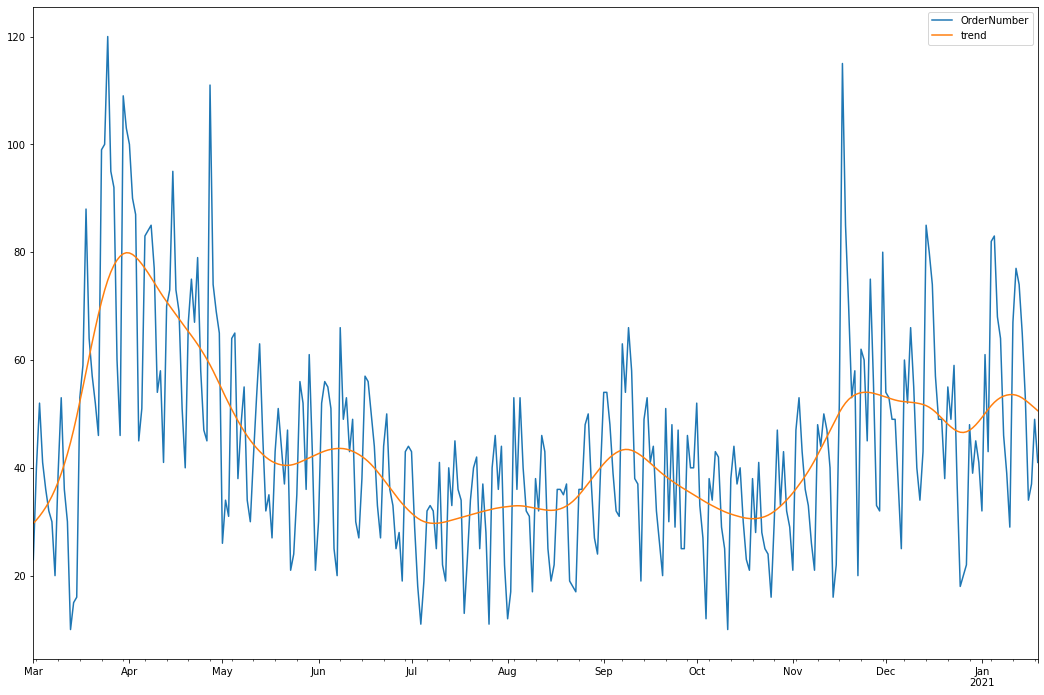

In [54]:
#Plotting the General Trend for the Order Number After Covid-19 Hit in Kenya
df2[['OrderNumber','trend']]['2020-03-01':].plot(figsize=(18,12))

### ETS Decomposition

In [55]:
#Use of ETS(Error-Trend_Seasonality) Decompisition to understand the Graph using Statsmodels

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
#Checking Seasonality Using Multiplicative Derivative

In [58]:
result = seasonal_decompose(df2['OrderNumber'], model='multiplicative', period=int(len(df2)/2))

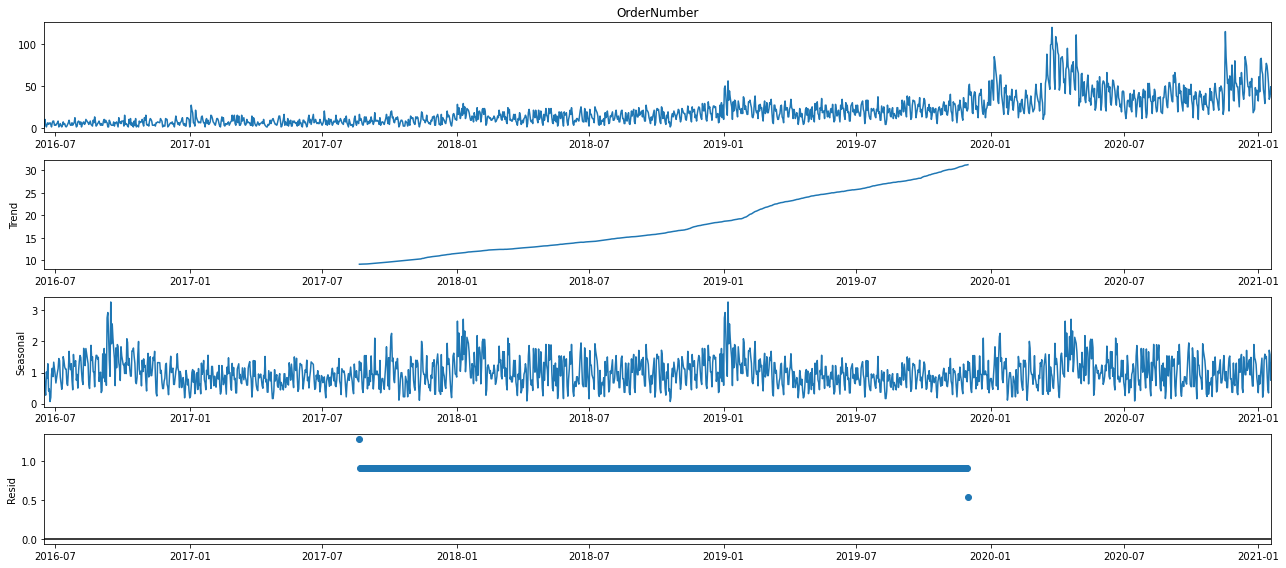

In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
result.plot();

In [60]:
#Interpretation of the EDA Decomposition

### Exponential-Weighted Moving Average

In [61]:
df2['EWMA-12'] = df2['OrderNumber'].ewm(span=12).mean()

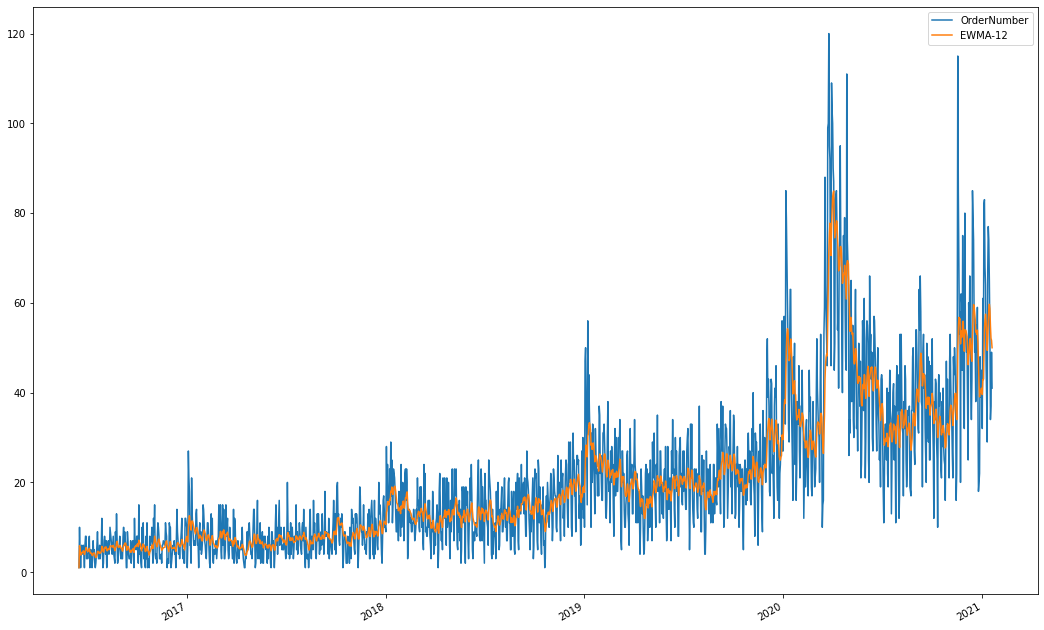

In [62]:
df2[['OrderNumber','EWMA-12']].plot(figsize=(18,12))

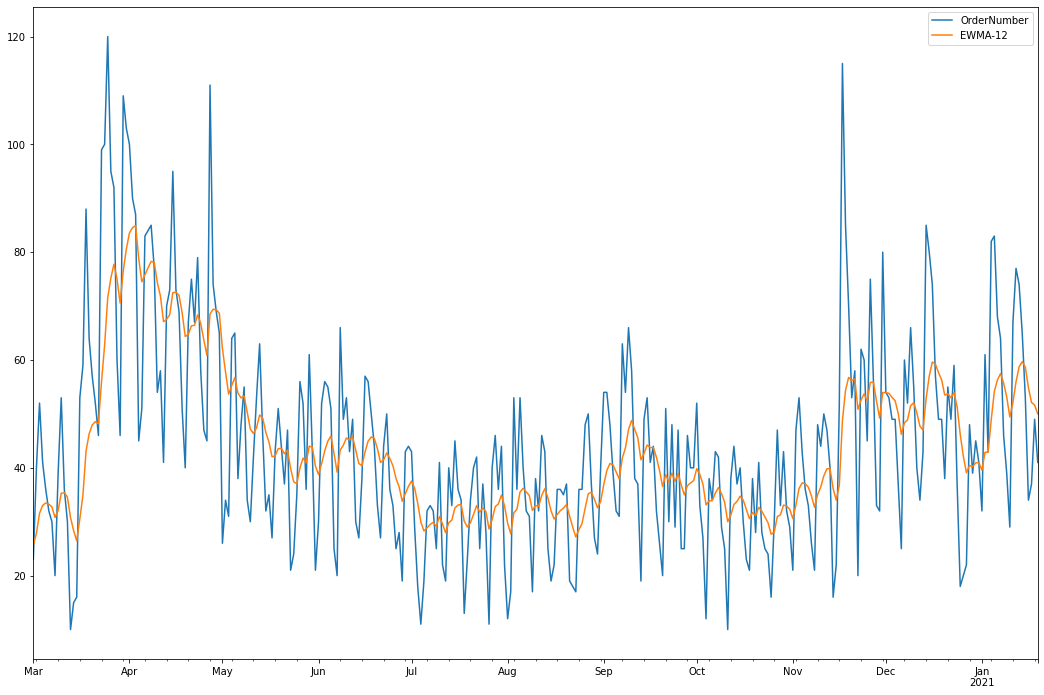

In [63]:
df2[['OrderNumber','EWMA-12']]['2020-03-01':].plot(figsize=(18,12))

### Holt-Winters Method

In [64]:
df2.index = df2.index.to_period('D')

In [65]:
df2.index

PeriodIndex(['2016-06-16', '2016-06-17', '2016-06-18', '2016-06-19',
             '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
             '2016-06-24', '2016-06-25',
             ...
             '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
             '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
             '2021-01-18', '2021-01-19'],
            dtype='period[D]', length=1662, freq='D')

#### Simple Exponential Smoothing

In [66]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [67]:
span = 12
alpha = 2/(span+1 )

In [68]:
df2['EWMA12'] = df2['OrderNumber'].ewm(alpha=alpha,adjust=False).mean()

In [69]:
model = SimpleExpSmoothing(df2['OrderNumber'])

In [70]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [71]:
df2['SES-12']=fitted_model.fittedvalues.shift(-1)

In [72]:
df2.head()

,OrderNumber,Yearly Mean,trend,EWMA-12,EWMA12,SES-12
2016-06-16,1,NaN,4.472542,1.000000,1.000000,1.000000
2016-06-17,10,NaN,4.487985,5.875000,2.384615,2.384615
2016-06-18,4,NaN,4.501257,5.143187,2.633136,2.633136
2016-06-19,1,NaN,4.513634,3.835345,2.381884,2.381884
2016-06-20,4,NaN,4.526076,3.880081,2.630825,2.630825


#### Expontial Smoothing Model

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
df2['DES_Add_12'] = ExponentialSmoothing(df2['OrderNumber'], trend='add').fit().fittedvalues.shift(-1)

In [75]:
df2.columns

Index(['OrderNumber', 'Yearly Mean', 'trend', 'EWMA-12', 'EWMA12', 'SES-12',
       'DES_Add_12'],
      dtype='object')

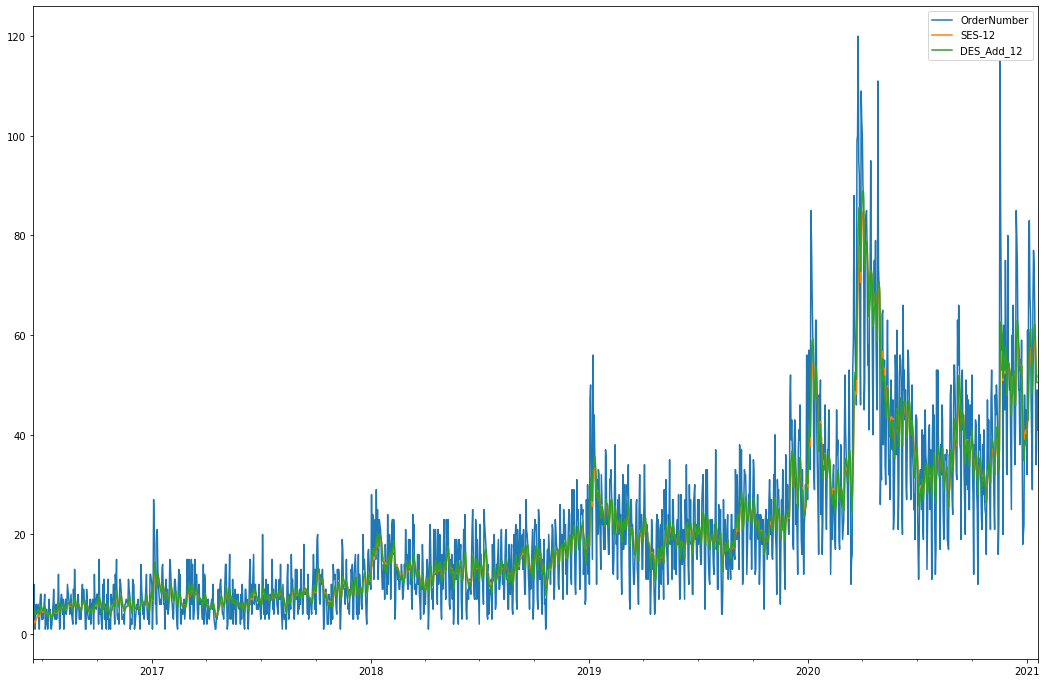

In [76]:
df2[['OrderNumber', 'SES-12','DES_Add_12']].plot(figsize=(18,12))

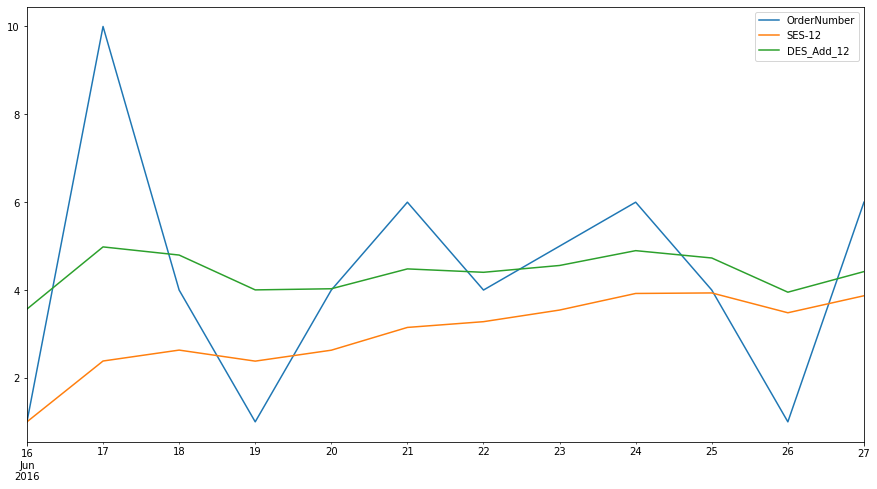

In [77]:
#Checking the last 1-year
df2[['OrderNumber', 'SES-12','DES_Add_12']].iloc[:12].plot(figsize=(15,8))

In [78]:
#Length of the DataFrame
len(df2)

1662

In [79]:
len(df2.loc['2020-03-01':])

325

In [80]:
train_data = df2.iloc[:1303]
test_data = df2.iloc[1302:]

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
fitted_model = ExponentialSmoothing(train_data['OrderNumber'],
                                    trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=360).fit()

C:\Users\moses.lusala\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [83]:
#Predicting 3years into the future
test_predictions = fitted_model.forecast(360)

In [84]:
test_predictions

2020-01-27    35.978933
2020-01-28    28.539214
2020-01-29    39.270218
2020-01-30    38.118190
2020-01-31    32.607476
                ...    
2021-01-16    34.549601
2021-01-17    27.115725
2021-01-18    17.918556
2021-01-19    19.186384
2021-01-20    15.015263
Freq: D, Length: 360, dtype: float64

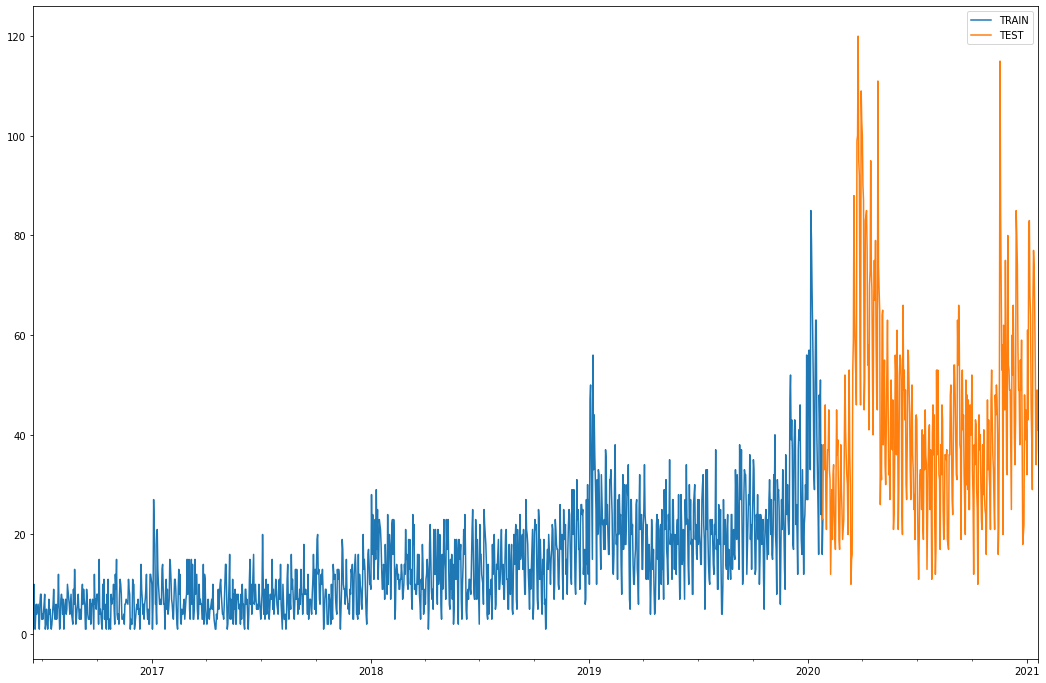

In [85]:
train_data['OrderNumber'].plot(legend=True,label='TRAIN',figsize=(18,12))
test_data['OrderNumber'].plot(legend=True,label='TEST')

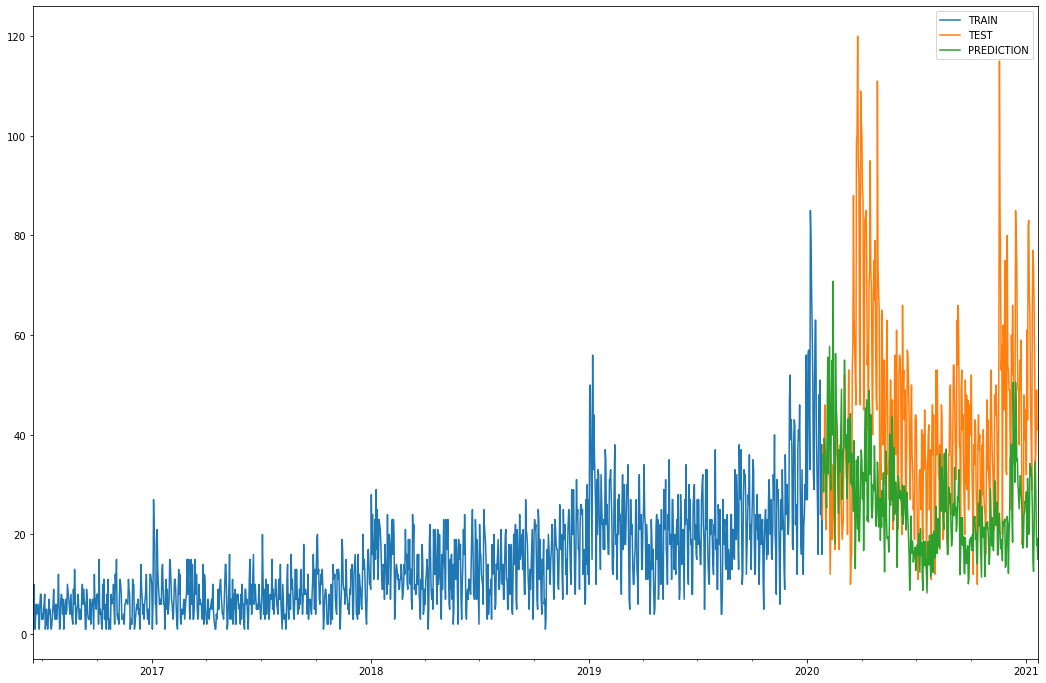

In [86]:
train_data['OrderNumber'].plot(legend=True,label='TRAIN',figsize=(18,12))
test_data['OrderNumber'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')

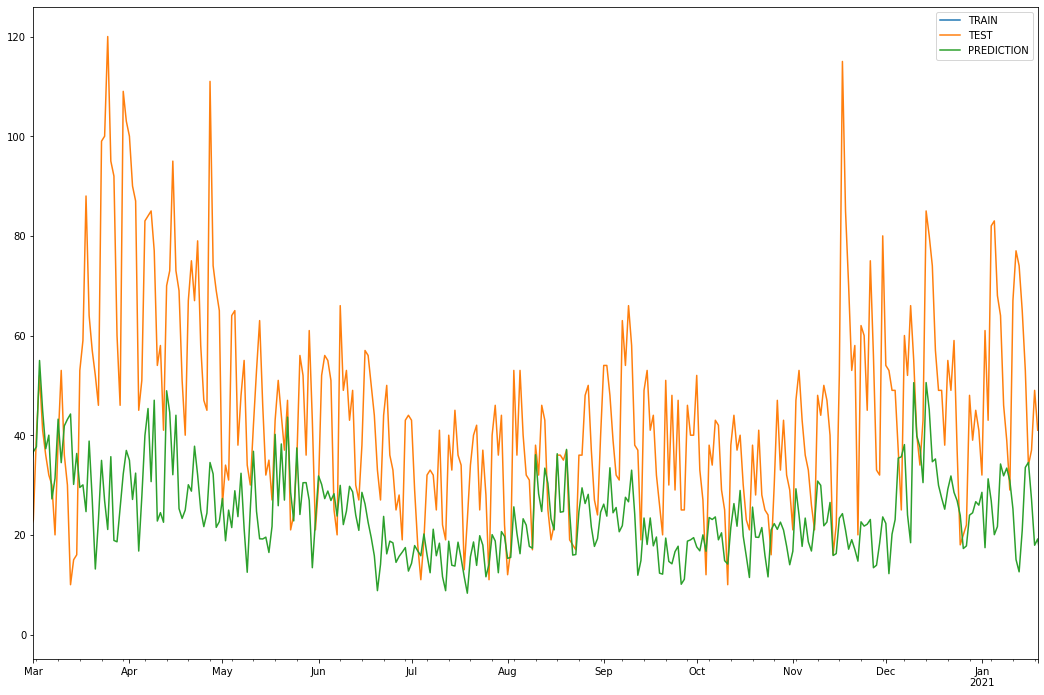

In [87]:
train_data['OrderNumber'].plot(legend=True,label='TRAIN',figsize=(18,12))
test_data['OrderNumber'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-03-01','2021-01-19'])

## To be COntinued

#### Model Evaluation using Mean-Square-Error and Mean-Absolute-Error

### Prescriptive Analysis

#### Forecasting